<a href="https://colab.research.google.com/github/Programapython/detector_osteoartritis/blob/main/practicas/unidad2/practica1/PRACTICA_N%C2%B0_5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDSeI - Redes Neuronales convolucionales

# Integrantes:

1. Perez García Gustavo Rafael

2. Salazar Llamoga William Jesús

3. Solon Aquino Jashua Jafet


Base de datos: https://www.kaggle.com/datasets/datamunge/sign-language-mnist

# Conexión con kaggle

# Instalaciones previas

In [1]:
!pip install -q kaggle
!pip install -q scikeras

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wjsl13","key":"de25c842288b2515f6589c5c8a522c84"}'}

# Descargar la base de datos

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
100% 62.6M/62.6M [00:04<00:00, 22.3MB/s]
100% 62.6M/62.6M [00:04<00:00, 16.3MB/s]
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


# Lectura de datos

In [4]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [5]:
print(train_df.keys())

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [6]:
# Elementos por clase

class_counts = train_df['label'].value_counts()
print(class_counts)

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64


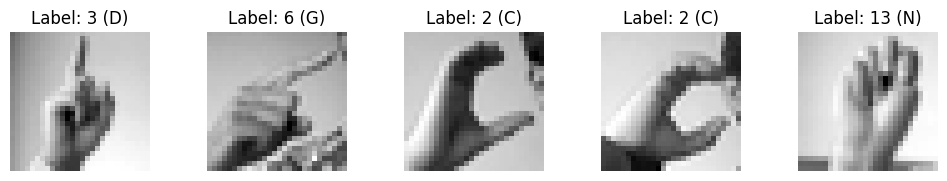

In [7]:
import matplotlib.pyplot as plt

label_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}

def plot_images(data, labels, num=5):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    fig.tight_layout()

    for i in range(num):
        ax = axes[i]
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {labels[i]} ({label_mapping[labels[i]]})')
        ax.axis('off')

    plt.show()

plot_images(train_df.iloc[:, 1:].values, train_df['label'].values)

# Transformación de datos

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

batch_size = 32

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values

X_val = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_val = test_df['label'].values

# Data Augmentation

In [9]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = datagen_train.flow(
    X_train,
    y_train,
    batch_size=batch_size)

datagen_val = ImageDataGenerator()
val_generator = datagen_val.flow(X_val, y_val, batch_size=batch_size)



```
1. ¿Qué es el data augmentation y cómo puede beneficiar el entrenamiento de una CNN?
```

* Es una técnica que consiste en generar nuevas muestras de entrenamiento a partir de las existentes, aplicando diversas transformaciones. Osea consiste en crear "versiones" ligeramente diferentes de las mismas imágenes, por ejemplo, rotándolas, volteándolas, ajustando el brillo, etc.

```
2. ¿Por qué es importante normalizar los datos de entrada y qué impacto tiene en el rendimiento del modelo?
```

* Porque es un proceso el cual hace que todas las características tengan una influencia similar en el modelo y pueda acelerar el proceso de entrenamiento.



# Creación del modelo

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,954 (519.35 KB)

 Trainable params: 132,954 (519.35 KB)

 Non-trainable params: 0 (0.00 B)



```
1. ¿Qué función cumplen las capas Conv2D y MaxPooling2D en una CNN?
```
* Capas Conv2D: Estas capas aplican filtros a las imágenes de entrada para extraer características locales. Los filtros son pequeños matrices de números que detectan patrones específicos en la imagen, como bordes, texturas o formas.

* Capas MaxPooling2D: Estas capas reducen la dimensionalidad de los mapas de características, seleccionando el valor máximo en cada ventana de la capa anterior. Esto ayuda a reducir el número de parámetros del modelo, prevenir el sobreajuste y hacer que la red sea más invariante a pequeñas traslaciones de la entrada.

```
2. ¿Qué es el Dropout y cómo ayuda a prevenir el sobreajuste en redes neuronales?
```
* Consiste en desactivar aleatoriamente un porcentaje de neuronas durante el entrenamiento. Esto evita que las neuronas se coadapten demasiado a los datos de entrenamiento y fuerza a la red a aprender representaciones más robustas.

```
3. ¿Por qué se utiliza la función de activación ReLU en las capas ocultas y cuáles son sus ventajas?
```

* La función ReLU se usa en las capas ocultas porque activa solo los valores positivos, lo que ayuda a la red a aprender más rápido y de manera eficiente. Su principal ventaja es que mejora el rendimiento de las redes profundas, evitando que los gradientes se reduzcan demasiado y agilizando el entrenamiento.

```
4. ¿Qué hace la función de activación softmax en la capa de salida y en qué tipo de problemas se utiliza comúnmente?
```

* Softmax asigna una probabilidad a cada una de las posibles clases de salida. La suma de todas las probabilidades es igual a 1.

```
5. ¿Qué es el tamaño del filtro (filter size) en una capa convolucional y cómo impacta la calidad de las características extraídas?
```

* El tamaño del filtro determina el área de la imagen que se observa al mismo tiempo. Filtros más grandes pueden capturar patrones más complejos y de mayor escala, mientras que filtros más pequeños detectan características más locales.

```
6. ¿Qué efecto tiene un stride mayor que 1 en la resolución de la salida de una capa convolucional?
```

* Un stride mayor que 1 hace que el filtro se mueva más pasos a la vez, reduciendo el tamaño de los mapas de características.

```
7. ¿Cómo se debe seleccionar el tamaño del filtro y el stride para optimizar el balance entre la extracción de características y la complejidad del modelo?
```

* La elección del tamaño del filtro y del stride es un compromiso entre la capacidad de extraer características y la complejidad del modelo.

Algunos factores a considerar son:
1. Tamaño de la imagen
2. Complejidad de las características
3. Recursos computacionales
4. Sobreajuste



# Terminación anticipada y Checkpoints

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

In [12]:
class CustomModelCheckpoint(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.best_val_accuracy = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')

        if current_val_accuracy and current_val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = current_val_accuracy
            print(f" Modelo guardado época {epoch + 1} con exactitud: {current_val_accuracy:.4f}")

        super().on_epoch_end(epoch, logs)

custom_model_checkpoint = CustomModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')



```
1. ¿Qué es el EarlyStopping y cómo contribuye a mejorar el proceso de entrenamiento de un modelo?
```

* EarlyStopping es una técnica de regularización que detiene el entrenamiento de un modelo cuando el rendimiento en un conjunto de validación deja de mejorar.

```
2. ¿Cuál es la función de ModelCheckpoint y por qué es útil guardar el mejor modelo durante el entrenamiento?
```
* ModelCheckpoint es una herramienta que permite guardar el modelo en determinados puntos del entrenamiento, como al final de cada época o cuando se alcanza una mejora en la métrica de evaluación.




# Entrenamiento

In [13]:
epochs = 5

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    # callbacks=[early_stopping, model_checkpoint]
    callbacks=[early_stopping, custom_model_checkpoint]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


851/858 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1092 - loss: 2.9512 Modelo guardado época 1 con exactitud: 0.5089
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.1102 - loss: 2.9471 - val_accuracy: 0.5089 - val_loss: 1.3796
Epoch 2/5
857/858 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4870 - loss: 1.5213 Modelo guardado época 2 con exactitud: 0.7526
858/858 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.4871 - loss: 1.5209 - val_accuracy: 0.7526 - val_loss: 0.7244
Epoch 3/5
849/858 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6321 - loss: 1.0452 Modelo guardado época 3 con exactitud: 0.8270
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.6324 - loss: 1.0443 - val_accuracy: 0.8270 - val_loss: 0.5104
Epoch 4/5
851/858 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7151 - loss: 0.8057 Modelo guardado época 4 con exactitud: 0.8387
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7152 - loss: 0.8054 - val_accuracy: 0.8387 - val_loss: 0.4175
Epoch 



```
1. ¿Qué significa el parámetro epochs y cómo afecta al entrenamiento de un modelo?
```

* Determina la cantidad de veces que un modelo se entrena con todo el conjunto de datos. Este valor afecta en gran medida los resultados del modelo, pues a mayor valor de este parámetro el modelo suele responder mejor pues le da posibilidad de aprender nuevos patrones; sin embargo, en algunos casos muchas epocas puede generar que el modelo se sobreajuste (Overfitting).

```
2. ¿Cuál es la diferencia entre train_generator y val_generator en el contexto del entrenamiento y la validación del modelo?
```


* Tanto train_generator como val_generator se encargan de proporcionar datos al modelo, la diferencia radica en la finalidad con la cual la realizan. train_generator tiene la finalidad que el modelo aprenda las relaciones y patrones de los datos, mientras que val_generator busca evaluar el rendimiento durante el entrenamiento.





# Predicciones

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


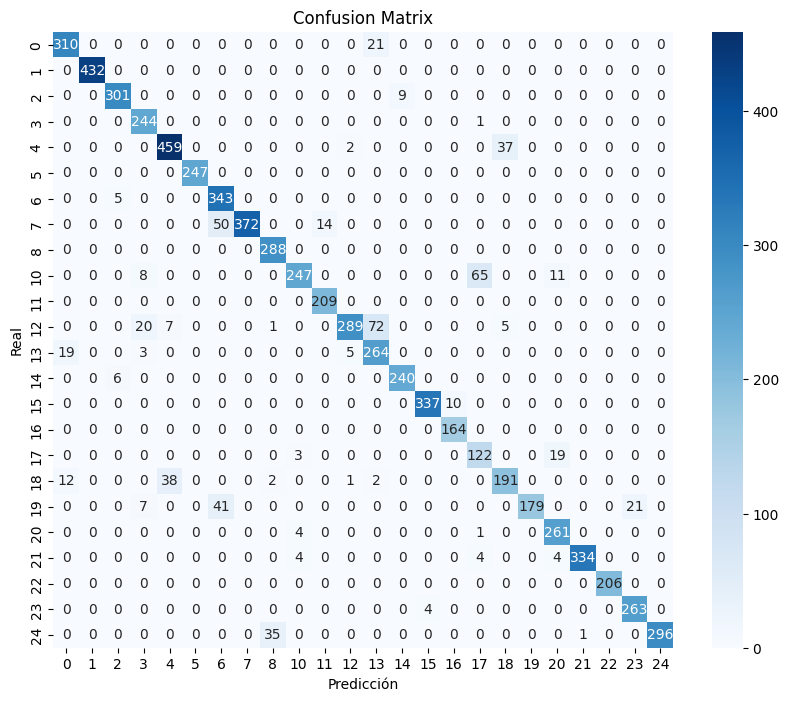

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       331
           1       1.00      1.00      1.00       432
          10       0.96      0.97      0.97       310
          11       0.87      1.00      0.93       245
          12       0.91      0.92      0.92       498
          13       1.00      1.00      1.00       247
          14       0.79      0.99      0.88       348
          15       1.00      0.85      0.92       436
          16       0.88      1.00      0.94       288
          17       0.96      0.75      0.84       331
          18       0.94      1.00      0.97       209
          19       0.97      0.73      0.84       394
           2       0.74      0.91      0.81       291
          20       0.96      0.98      0.97       246
          21       0.99      0.97      0.98       347
          22       0.94      1.00      0.97       164
          23       0.63      0.85      0.72       144
          24       0.82    

In [14]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

best_model = load_model('best_model.keras')

X_test = test_df.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 28, 28, 1)

predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=np.unique(y_test.astype(str))))

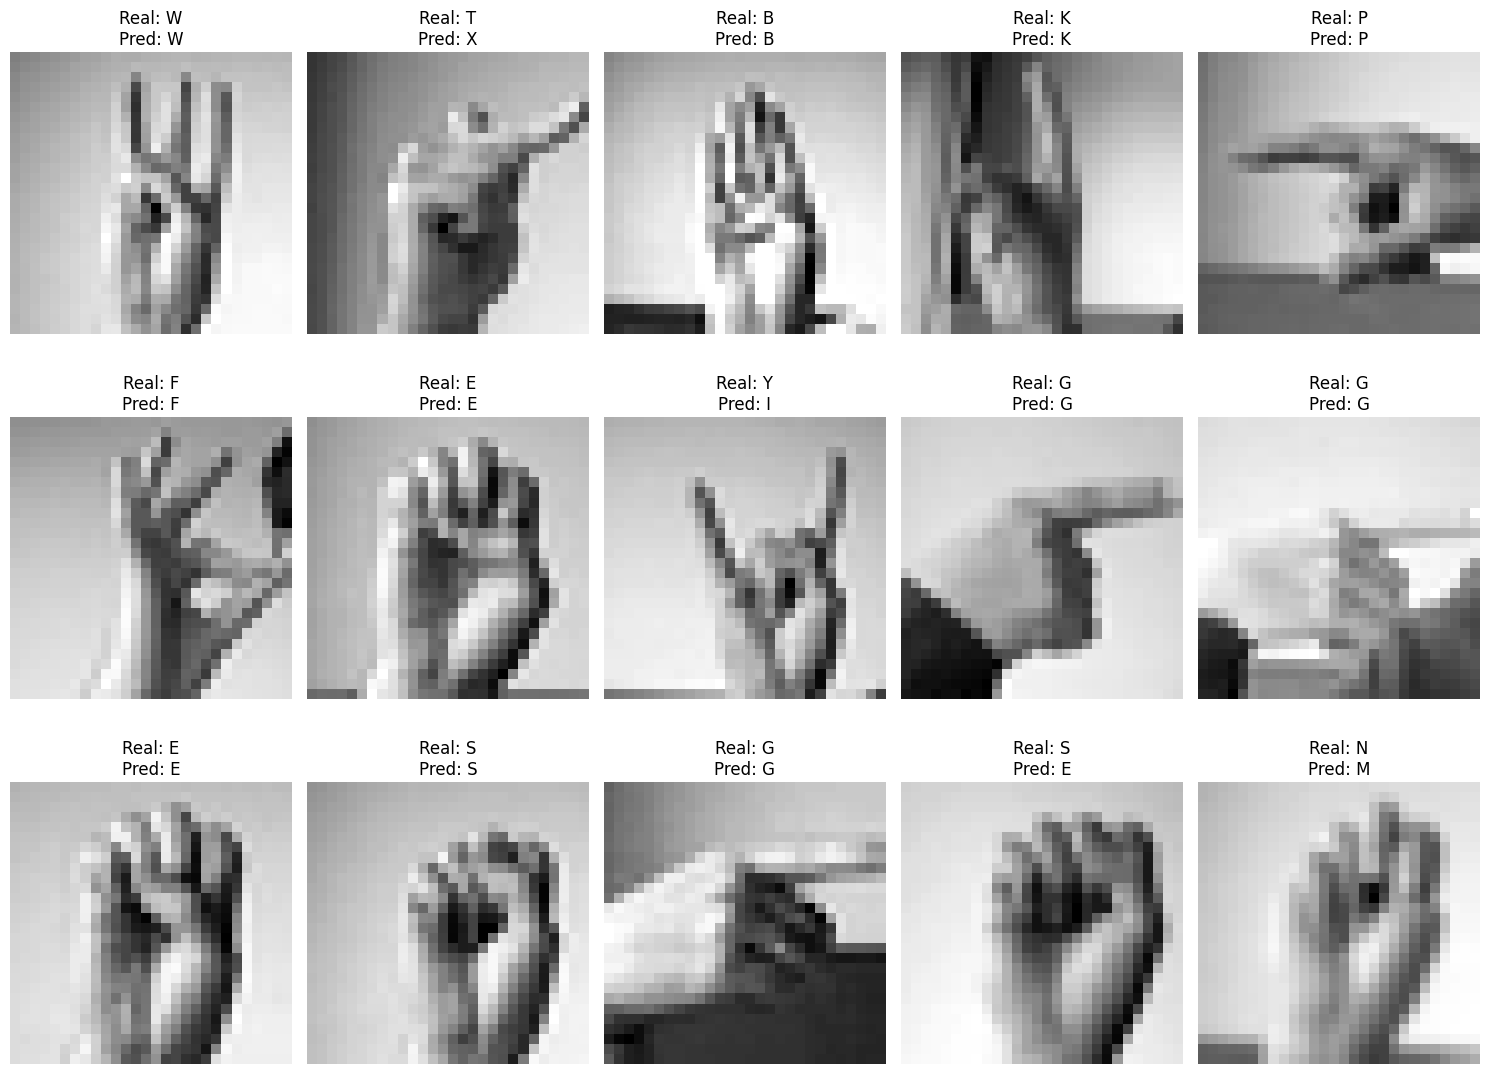

In [15]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_show = 15
indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
images_per_row = 5

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    plt.subplot(num_images_to_show // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {label_mapping[y_test[idx]]}\nPred: {label_mapping[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



```
1. ¿Qué es el confusion_matrix y qué información proporciona sobre el rendimiento del modelo?
```
* Es una herramienta que fundamental para entender el rendimiento de un modelo de clasificación. Este muestra una visión detallada de los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos que un modelo esta
produciendo.

```
2. ¿Cómo se interpreta el classification_report y qué métricas se incluyen en él?
```

* El classification_report al igual que confusion_matrix es una herramienta para evaluar el rendimiento de un modelo de clasificación, consta de una tabla con diferentes métricas, las cuales son:

1. Precision: Mide la proporción de predicciones positivas correctas entre todas las predicciones positivas.

2. Recall: Mide la proporción de predicciones positivas correctas entre todas las instancias positivas reales.

3. F1-score: Es la media armónica de la precisión y el recall.

4. Support: Indica el número de instancias reales de cada clase.

Para interpretar el classification_report, debes analizar cada métrica para cada clase.
```
3. ¿Por qué es importante utilizar el conjunto de prueba (X_test y y_test) para evaluar el modelo?
```
Pues conjunto de prueba permite medir la capacidad de generalización del modelo. Es decir, el conjunto de prueba ayuda a determinar qué tan bien un modelo puede predecir resultados con datos que no ha visto antes.
```
4. ¿Qué rol juega la función np.argmax en el proceso de obtención de clases predichas?
```
La función np.argmax ayuda a identificar el índice del valor máximo dentro de un array, es decir, el índice de la clase con la probabilidad más alta. En resumen, permite convertir las probabilidades de salida del modelo en predicciones de clase concretas.
```
5. ¿Qué información visual adicional proporciona un mapa de calor (heatmap) de la matriz de confusión?
```
Proporciona una una representación visual de los datos de la matriz de confusión, donde cada celda de la matriz se colorea según el valor que representa. Esto permite identificar rápidamente las áreas donde el modelo tiene un buen rendimiento (colores más intensos) y las áreas donde el modelo tiene un rendimiento más débil (colores más claros).



# Refinamiento

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', **kwargs):
    dropout_rate = kwargs.get('dropout_rate', 0.5)
    model = Sequential([
        Input((28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [17]:
from sklearn.model_selection import GridSearchCV

epochs = 5
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=32, verbose=0)

param_grid = {
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.2, 0.5, 0.7]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

print(f"Mejor: {grid_result.best_score_} usando {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Mejor: 0.9991622363357693 usando {'model__dropout_rate': 0.2, 'model__optimizer': 'Adam'}


In [18]:
val_accuracy = grid_result.best_estimator_.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.9390686001115449


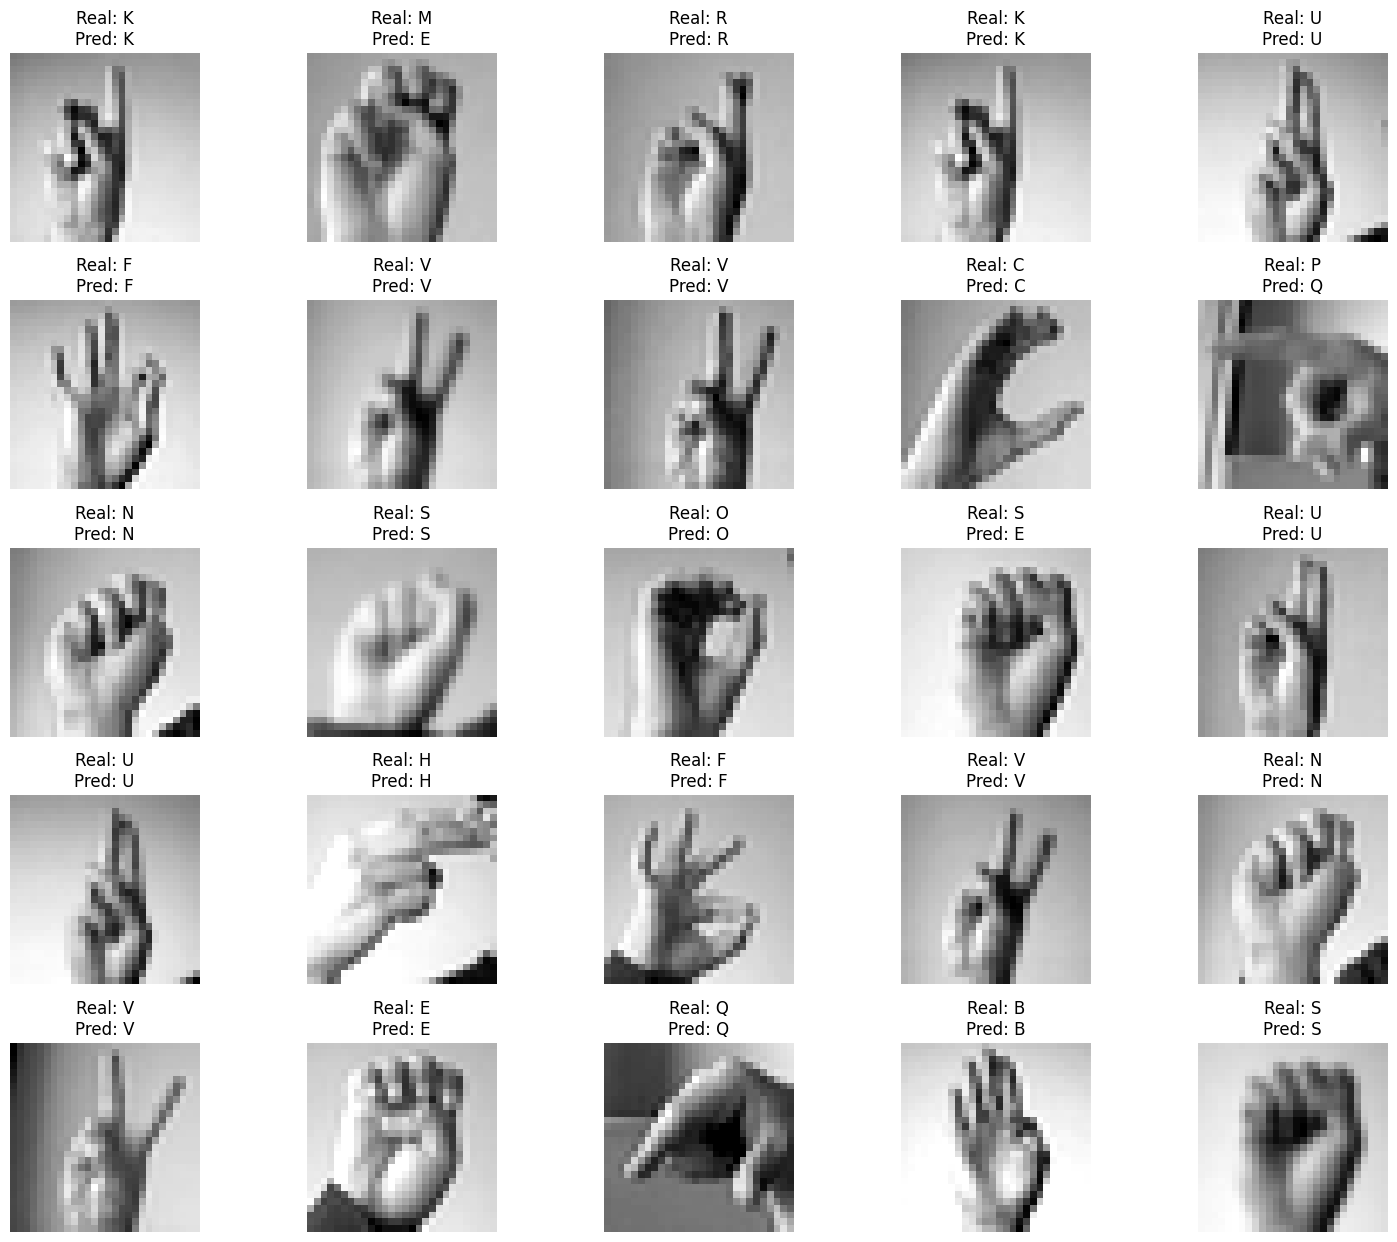

In [19]:
num_images_to_show = 25
indices = np.random.choice(len(X_val), num_images_to_show, replace=False)
images_per_row = 5

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    plt.subplot(num_images_to_show // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(X_val[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {label_mapping[y_val[idx]]}\nPred: {label_mapping[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



```
1. ¿Qué es GridSearchCV y cómo se utiliza para optimizar el rendimiento de un modelo?
```

* Es una técnica de validación cruzada que se utiliza para encontrar los mejores parámetros para un modelo. Se utiliza para probar diferentes combinaciones de parámetros para encontrar la configuración que produce el mejor rendimiento.

```
2. ¿Qué representan los parámetros en param_grid y por qué es importante ajustar el optimizador y la tasa de dropout?
```

* Representan los hiperparámetros que se van a probar en la búsqueda en rejilla. Estos hiperparámetros no se aprenden durante el entrenamiento del modelo, sino que se establecen antes del entrenamiento. Ajustar el optimizador y la tasa de dropout es importante pues estos parámetros afectan directamente el rendimiento del modelo.

```
3. ¿Qué significa el parámetro cv=3 en el contexto de la validación cruzada y cómo influye en la evaluación del modelo?
```

* El parámetro cv=3 indica que se divide el conjunto de datos en 3 subconjuntos o "folds". En cada iteración, se utiliza uno de estos subconjuntos como conjunto de prueba y los dos restantes como conjunto de entrenamiento. Este proceso se repite 3 veces, utilizando cada subconjunto como conjunto de prueba una vez.
La influencia de cv=3 en la evaluación del modelo es que se obtiene una estimación más robusta del rendimiento del modelo, ya que se utiliza una mayor parte de los datos para el entrenamiento y la prueba. Esto ayuda a reducir la varianza de la evaluación y a obtener una mejor idea del rendimiento general del modelo.

